In [7]:
import pandas as pd
from backtest import backtest_dca

import config as cfg

In [ ]:
# !python load_data.py

Loading data for ['SPY', 'ASML.AS'] from 2018-01-01 to 2026-02-08...
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Loading data for {'BTC': 'BTC-USD', 'ETH': 'ETH-USD', 'BNB': 'BNB-USD', 'XRP': 'XRP-USD', 'SOL': 'SOL-USD', 'TRON': 'TRX-USD', 'ADA': 'ADA-USD', 'XMR': 'XMR-USD', 'LINK': 'LINK-USD', 'AVAX': 'AVAX-USD'} from 2018-01-01 to 2026-02-08...
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[****

# crypto

In [9]:
df_crypto = pd.read_csv("data/crypto.csv", index_col=0, parse_dates=True)
df_crypto = df_crypto.dropna()
df_crypto

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX
Date,,,,,,,,,,
2020-07-13,9243.614258,239.604584,18.409563,0.198575,1.175734,0.017553,0.124156,69.279694,7.182291,4.896294
2020-07-14,9243.213867,240.211487,18.082909,0.198809,1.148075,0.017641,0.131963,67.922226,8.103465,4.986754
2020-09-22,10538.459961,344.503174,24.100740,0.233417,2.915519,0.025044,0.081754,92.954674,8.764185,5.234632
2020-09-23,10246.186523,321.116302,22.856977,0.221221,2.836757,0.024859,0.076763,87.467812,7.702259,4.118469
2020-09-24,10760.066406,349.355591,24.613825,0.232905,3.132715,0.026193,0.082817,91.793953,9.817477,4.566561
...,...,...,...,...,...,...,...,...,...,...
2026-02-03,75633.546875,2227.558838,753.578186,1.574199,97.563904,0.285627,0.290788,374.591797,9.450989,9.895763
2026-02-04,73019.703125,2143.504150,697.861755,1.510476,92.029305,0.282773,0.286301,382.406860,9.251476,9.711348
2026-02-05,62702.097656,1821.683105,606.542847,1.213521,78.187416,0.269199,0.244885,292.434998,7.907181,8.299232


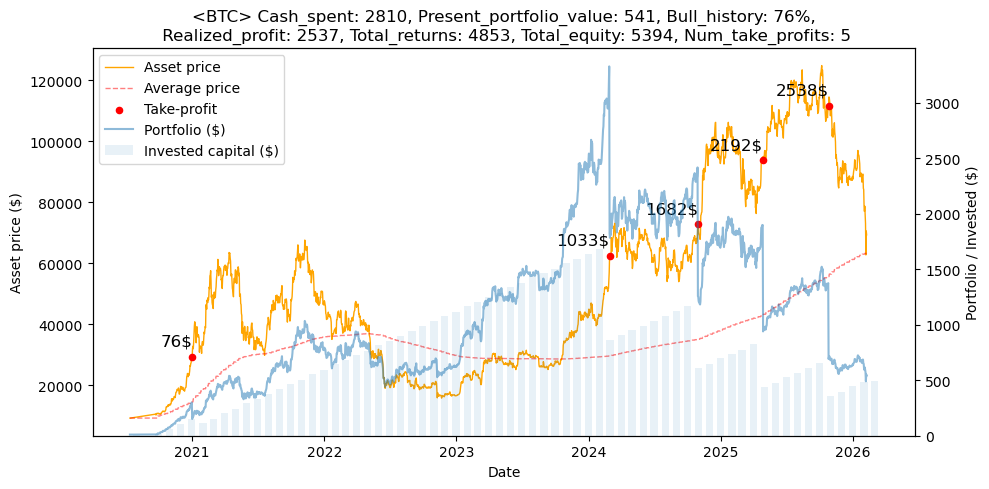

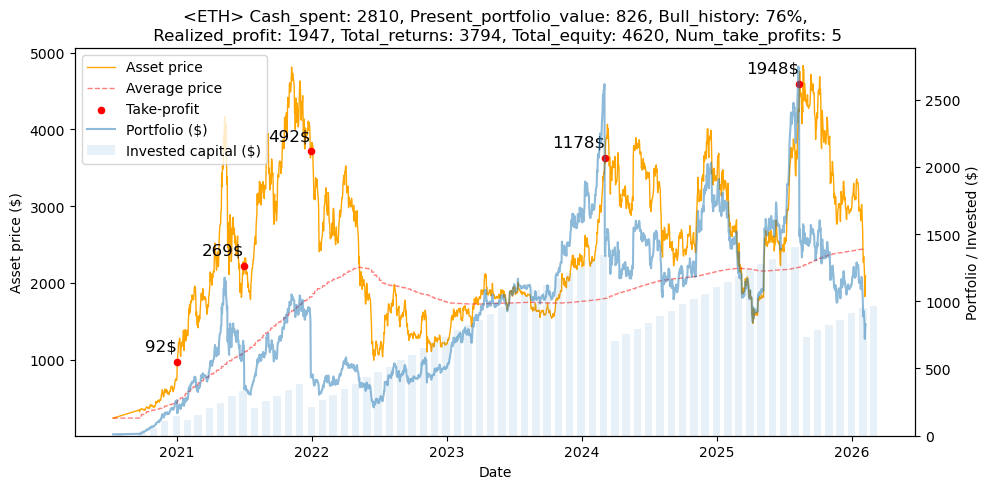

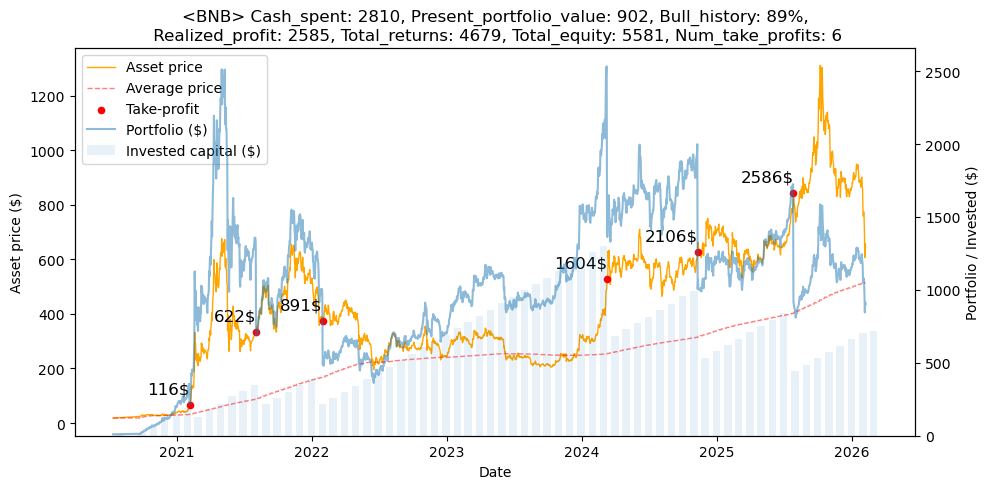

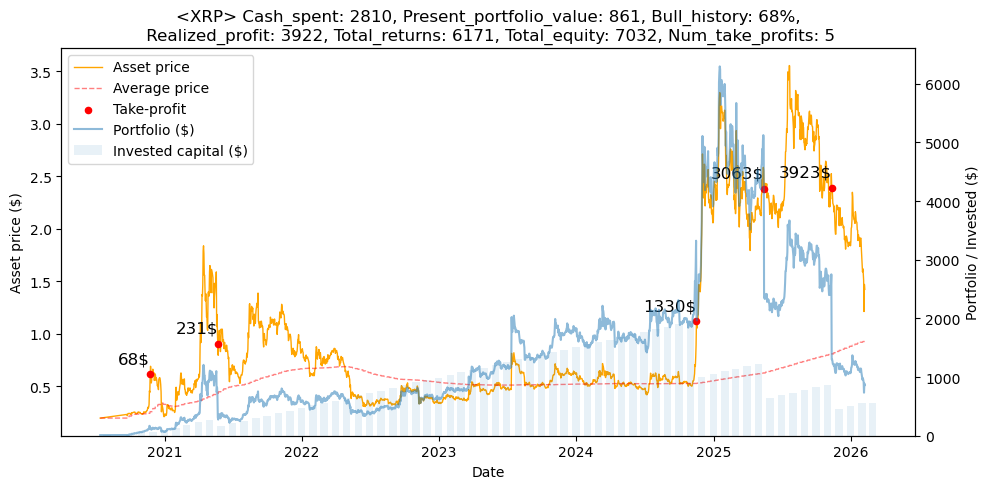

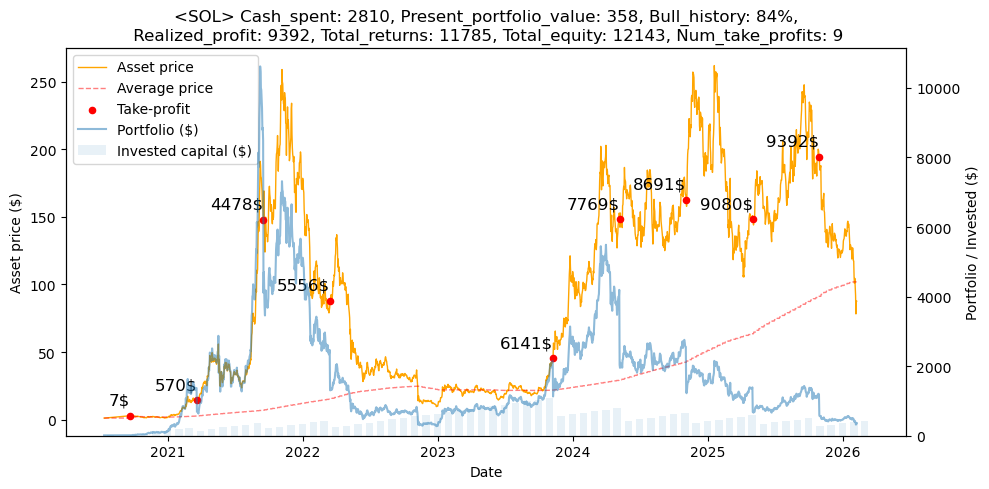

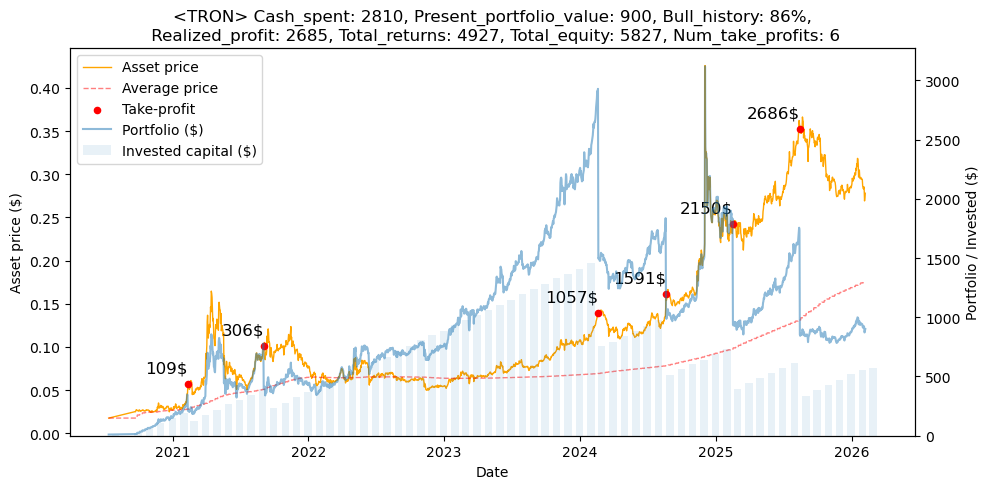

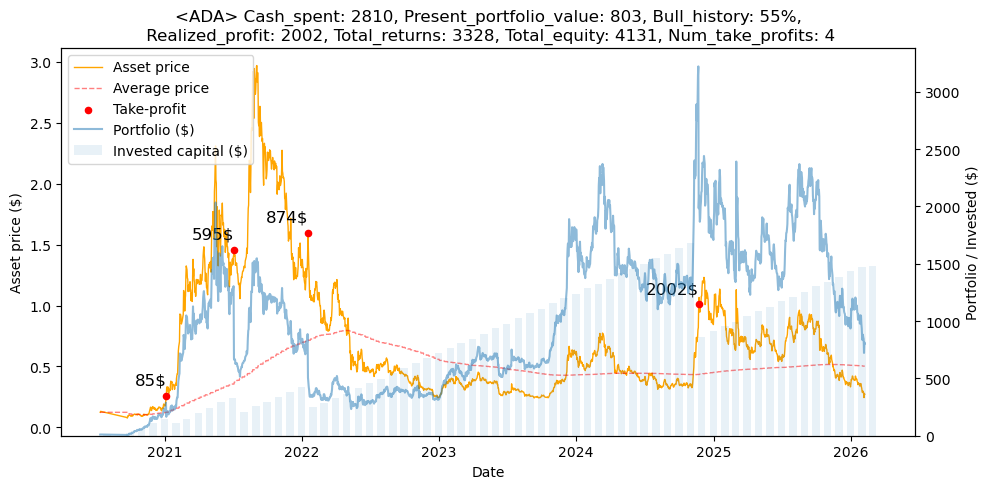

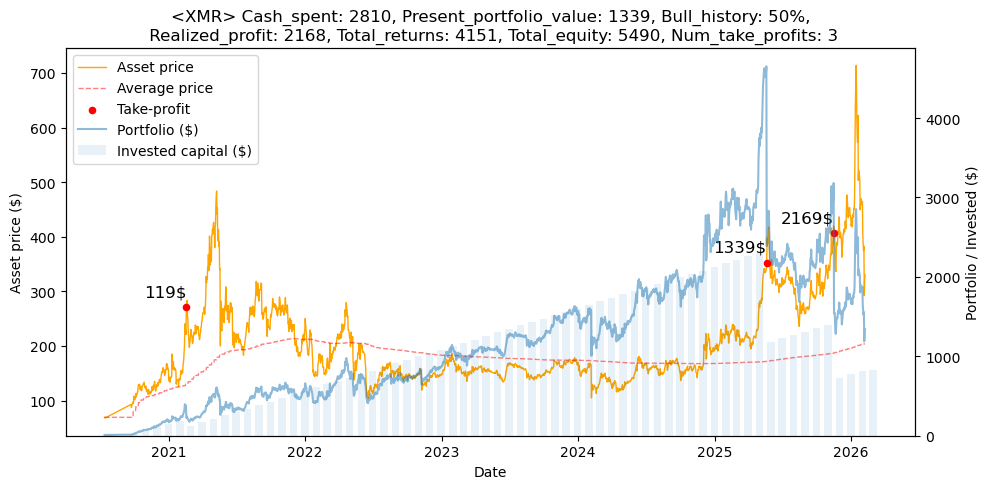

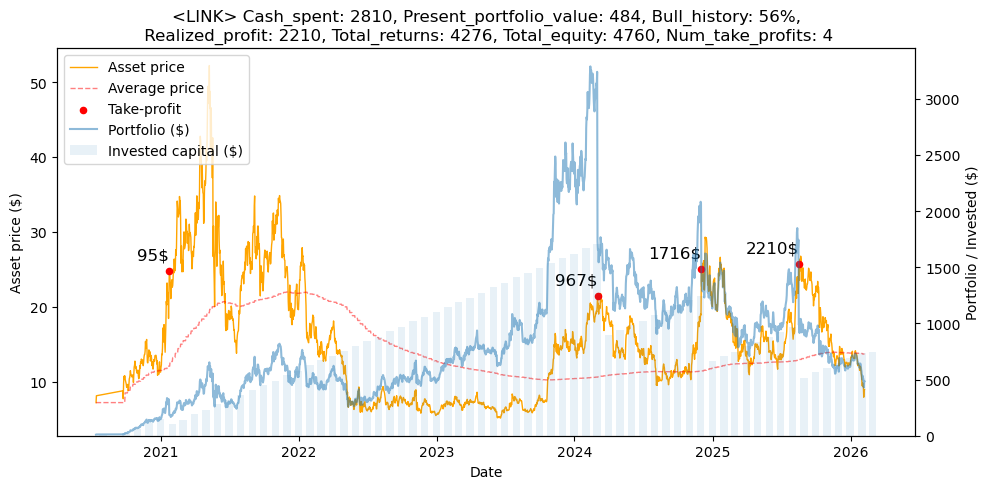

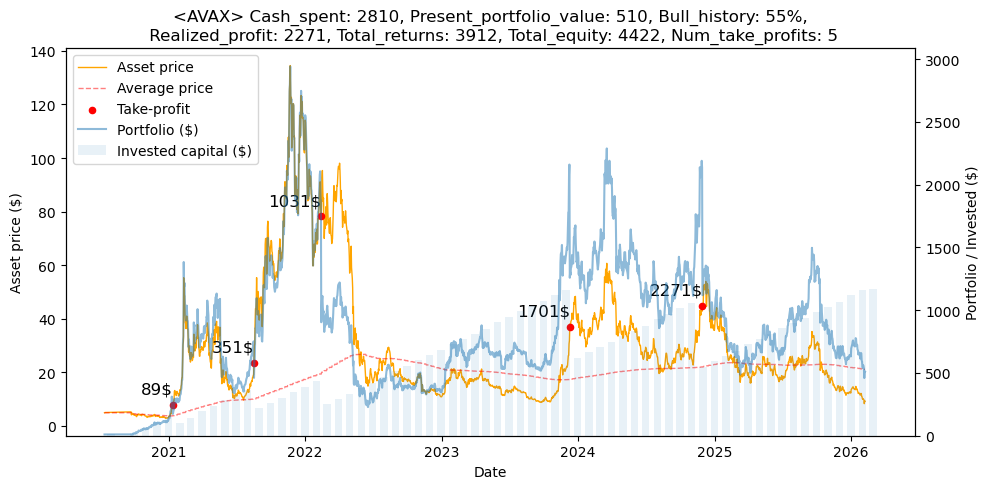

Total invested: $28100.00
Total profit: $31719.00
Total equity: $59400.00


In [14]:
total_invested = 0
total_profit = 0
total_equity = 0

for token in df_crypto.columns:
    token_prices = df_crypto[token]

    result, metrics = backtest_dca(
        target=token,
        prices=token_prices,
        buy_amount=cfg.crypto_regular_amount,
        freq=cfg.crypto_freq,
        fee=cfg.crypto_fee,
        profit_multiple=cfg.crypto_profit_multiple,
        cooldown_days=cfg.crypto_cooldown_days,
        plot=True
    )
    total_invested += metrics['Cash_spent']
    total_profit += metrics['Realized_profit']
    total_equity += metrics['Total_equity']

print(f"Total invested: ${total_invested:.2f}")
print(f"Total profit: ${total_profit:.2f}")
print(f"Total equity: ${total_equity:.2f}")

# stocks

In [11]:
df_stocks = pd.read_csv("data/stocks.csv", index_col=0, parse_dates=True)
df_stocks = df_stocks.dropna()
df_stocks

,SPY,ASML.AS
Date,,
2018-01-02,268.769989,146.000000
2018-01-03,270.470001,148.199997
2018-01-04,271.609985,149.850006
2018-01-05,273.420013,151.850006
2018-01-08,273.920013,153.750000
...,...,...
2026-02-02,695.409973,1224.800049
2026-02-03,689.530029,1190.400024
2026-02-04,686.190002,1140.599976


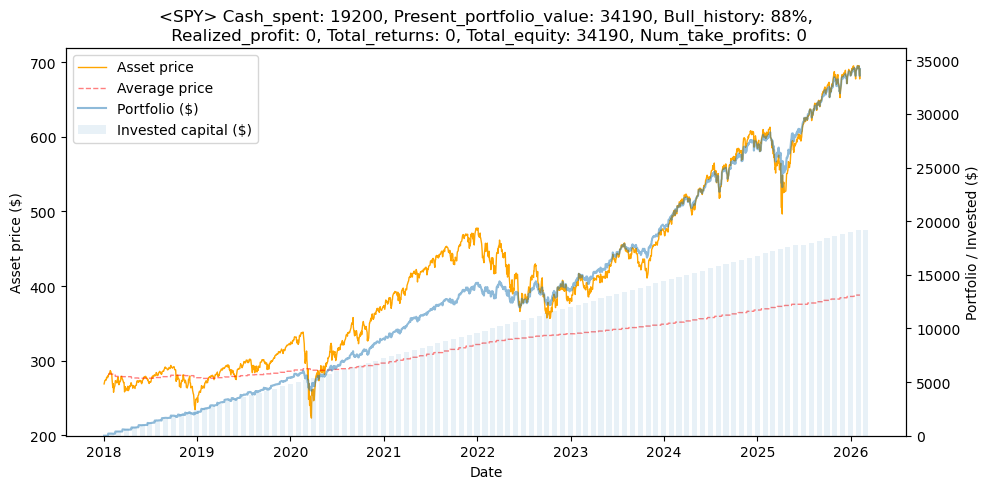

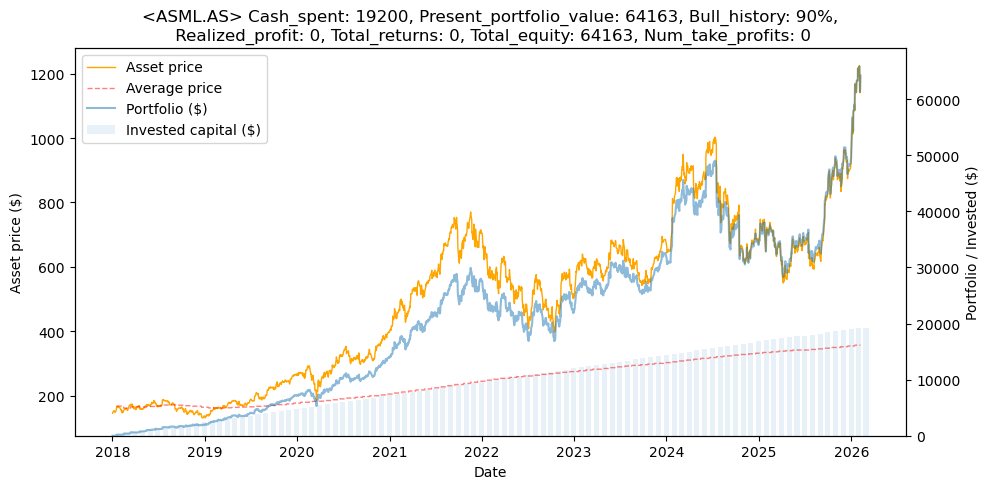

Total invested: $38400.00
Total profit: $0.00
Total equity: $98353.00


In [12]:
total_invested = 0
total_profit = 0
total_equity = 0

for stock in df_stocks.columns:
    stock_prices = df_stocks[stock]

    result, metrics = backtest_dca(
        target=stock,
        prices=stock_prices,
        buy_amount=cfg.stock_regular_amount,
        freq=cfg.stock_freq,
        fee=cfg.stock_fee,
        profit_multiple=cfg.stock_profit_multiple,
        cooldown_days=cfg.stock_cooldown_days,
        plot=True
    )

    total_invested += metrics['Cash_spent']
    total_profit += metrics['Realized_profit']
    total_equity += metrics['Total_equity']

print(f"Total invested: ${total_invested:.2f}")
print(f"Total profit: ${total_profit:.2f}")
print(f"Total equity: ${total_equity:.2f}")